In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [16]:
df.rename(columns={
    'Selling_Price': 'Price',
    'Present_Price': 'Original_Price'
}, inplace=True)

df.drop('Car_Name', axis=1, inplace=True)

le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    df[col] = le.fit_transform(df[col])

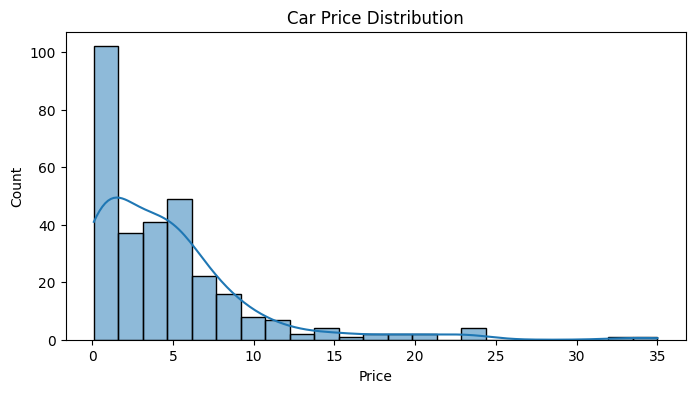

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], kde=True)
plt.title("Car Price Distribution")
plt.show()

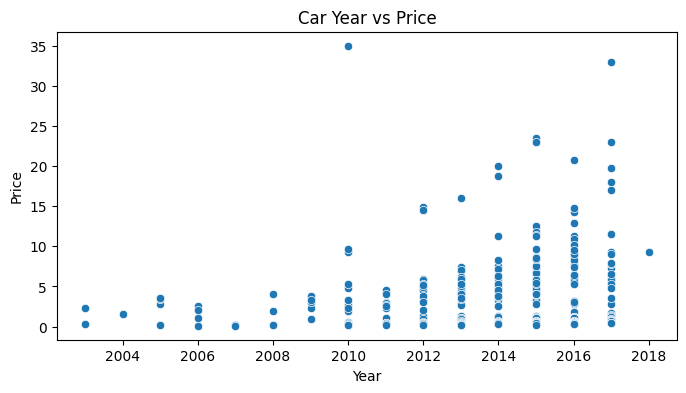

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Car Year vs Price")
plt.show()

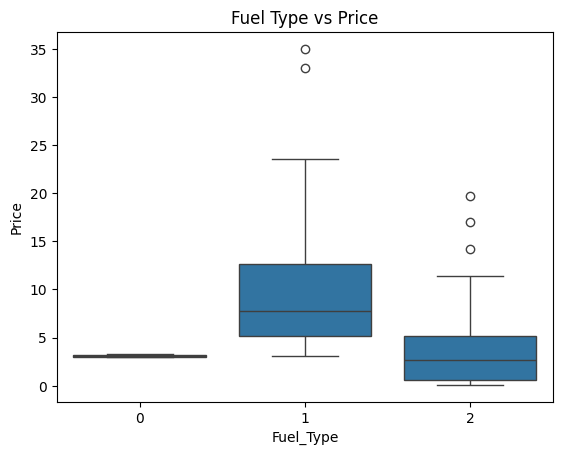

In [19]:
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

In [20]:
X = df.drop('Price', axis=1)
y = df['Price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression MAE: 1.2219323621752294
Linear Regression R2 Score: 0.8466902419662664


In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.6171081967213115
Random Forest R2 Score: 0.9630473458807466


In [24]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

comparison

,Model,MAE,R2 Score
0,Linear Regression,1.221932,0.846690
1,Random Forest,0.617108,0.963047


- Random Forest performed better than Linear Regression.

- Car price depends heavily on year, original price, and transmission.

- Feature encoding and proper preprocessing improved accuracy.
